In [1]:
### duffing oscillator

import matplotlib
import numpy as np
from numpy import zeros, linspace, pi, cos, array
from matplotlib import pyplot as plt

t0=0
tf=30*pi
omega=1.2                     
beta=1              
delta=0.3             
gamma=0.36          
alpha=1              
n=10000                                     #iteration
h=(tf-t0)/(n-1)                            #stepsize
print('the value of h is',h)
u0=0                                       #initial displacement


t=linspace(t0,tf,n)
v=zeros([n])
u=zeros([n])
u[0]=u0
v[0]=0                                     #initial velocity

##### DEFINING FUNCTIONS

def dudt(t,u,v):                                                #### u' = v                                              
    return(v)

def funt(t,u,v):                                                #### v' = -delta*v+alpha*u-beta*u**3+gamma*cos(omega*t)   
    return (-delta*v+alpha*u-beta*u**3+gamma*cos(omega*t))

######  RK4 ALGORITHM USING FOR LOOP
 
for i in range(1,n):
    k1=h*dudt(t[i-1],u[i-1],v[i-1])
    l1=h*funt(t[i-1],u[i-1],v[i-1])
    
    k2=h*dudt(t[i-1]+(0.5*h),u[i-1]+(k1*0.5),v[i-1]+(l1*0.5))
    l2=h*funt(t[i-1]+(0.5*h),u[i-1]+(k1*0.5),v[i-1]+(l1*0.5))
    
    k3=h*dudt(t[i-1]+(0.5*h),u[i-1]+(k2*0.5),v[i-1]+(l2*0.5))
    l3=h*funt(t[i-1]+(0.5*h),u[i-1]+(k2*0.5),v[i-1]+(l2*0.5))
    
    k4=h*dudt(t[i-1]+h,u[i-1]+(k3),v[i-1]+(l3))
    l4=h*funt(t[i-1]+h,u[i-1]+(k3),v[i-1]+(l3))
    
    u[i]=u[i-1]+(1/6)*(k1+(2*k2)+(2*k3)+k4)
    v[i]=v[i-1]+(1/6)*(l1+(2*l2)+(2*l3)+l4)

### PLOT

plt.plot(t,u,'-r')
plt.xlabel('time(t)')
plt.ylabel('displacement(u)')
plt.show()
print('The value of GAMMA =',gamma)
fig = plt.figure()
plt.title("DUFFING_phaseplot_gamma=0.36")
plt.plot(u[5000:10000],v[5000:10000],'-g')
plt.xlabel('displacement(u)')
plt.ylabel('velocity(v)')
plt.show()
fig.savefig('duff_plot_gamma=0.36.png')
#fig.savefig('duff_plot_gamma=0.36.eps')

#### SAMPLING

print("SAMPLING")


fig = plt.figure()
plt.plot(u[5000:10000:500],v[5000:10000:500],'.g')
data500=u[5000:10000:500],v[5000:10000:500]
np.savetxt('RAW_t=500_data(0.36).dat', data500)
plt.title("SAMPLING_t=500,gamma=0.36")
plt.xlabel('displacement(u)')
plt.ylabel('velocity(v)')
plt.show()
fig.savefig('duff_sampling_gamma=0.36_t=500.png')
#fig.savefig('duff_sampling_gamma=0.36_t=500.eps')


the value of h is 0.009425720532822661


<Figure size 640x480 with 1 Axes>

The value of GAMMA = 0.36


<Figure size 640x480 with 1 Axes>

SAMPLING


<Figure size 640x480 with 1 Axes>

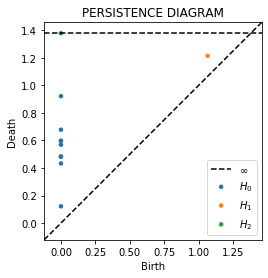

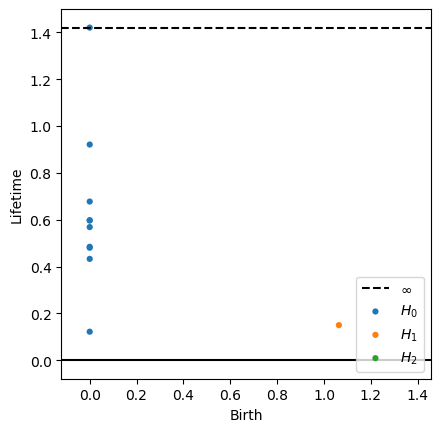

In [2]:
### PH for t=500------gamma=0.36

import matplotlib
import numpy as np
from ripser import ripser
from persim import plot_diagrams
from matplotlib import pyplot as plt


data = np.loadtxt('RAW_t=500_data(0.36).dat')
#print(data)
fig = plt.figure()
data1=data.transpose()
#print(data1)
plt.title("PERSISTENCE DIAGRAM")
diagrams = ripser(data1, maxdim=2)['dgms']
fig.savefig('persistence diagram_gamma=0.36,t=500.png')
fig.savefig('persistence diagram_gamma=0.36,t=500.eps')

#print(diagrams)
np.savetxt('ripser_plot_gamma=0.36,t=500.dat', diagrams, fmt='%s')
plot_diagrams(diagrams, show=True)
plot_diagrams(diagrams, lifetime=True)